In [ ]:
Sentiment analysis using Deep learning


In [47]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers


In [2]:
df = pd.read_csv('/Users/manaswithachimakurthi/Desktop/dlsenti/Tweets.csv')

In [3]:
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df.reindex(np.random.permutation(df.index))  


In [5]:
df=df[['text','airline_sentiment']]

In [8]:
df.head()
#df.shape

,text,airline_sentiment
1718,@united yes... A ride home would be perfect.. ...,negative
2843,@united mine is GJQX6J husband is A587CW (Can'...,neutral
1169,@united arrived in YYZ to take our flight to T...,negative
5980,@SouthwestAir having trouble reFlight Booking ...,negative
1589,@united no thanks,neutral


In [9]:
#remove stop words and mention words
from nltk.corpus import stopwords
def clean_data(input_text):
    stopwords_l = set(stopwords.words('english'))
    c_input=input_text.split(' ')
    
    
    wlist=["n't", "not", "no"]
    
    w_l=[word for word in c_input if word not in stopwords_l or word in wlist and len(word)>1]
    return ' '.join(w_l)

def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
    
 

In [10]:
df.text=df.text.apply(clean_data).apply(remove_mentions)

In [11]:
df.head()

,text,airline_sentiment
1718,yes... A ride home would perfect.. A fete one...,negative
2843,mine GJQX6J husband A587CW (Can't DM reason.),neutral
1169,arrived YYZ take flight Taiwan. Reservation m...,negative
5980,trouble reFlight Booking Problems Cancelled F...,negative
1589,no thanks,neutral


In [12]:
#splitting the data into test and train 

X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)

In [13]:
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [45]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512
#Size of the batches used in the mini-batch gradient descent

MAX_LEN=24

In [15]:
#convert the word into tokens and into integers to store in a dictionary

#using keras tokenizer function 

tk=Tokenizer(num_words=NB_WORDS , filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', lower=True, split=" ")
tk.fit_on_texts(X_train)

In [16]:
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('i', 4620), ('flight', 3590), ('not', 1442), ('no', 1379), ('get', 1207)]


In [24]:
y_train.head()

12967    negative
1733     negative
7899     negative
9660     negative
4245      neutral
Name: airline_sentiment, dtype: object

In [25]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[4], X_train_seq[4]))

" it's really big bad thing" is converted into [2941, 128, 1292, 99, 1419, 131, 42, 2, 852, 853, 532, 6105, 180, 1243, 630, 4313, 744]


In [37]:
X_train_seq[5]

[123,
 731,
 302,
 1171,
 37,
 407,
 111,
 923,
 6115,
 6116,
 531,
 6,
 7,
 6117,
 8,
 6,
 7,
 6118]

In [39]:
#nexxt we are conveerting the above vectors into one hot coding (the vectors keeps a value of 1 for the word and all remains 0)

13176

In [26]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs


In [27]:
#creating one hot encoding for all the train and test data 

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)


In [28]:
X_train_oh[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
len(X_train_oh[1])

10000

In [30]:
# converting the sentiment labels into integers and then convert into one hot encoders of the target sentiment
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [31]:

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

"neutral" is converted into 0
"0" is converted into [1. 0. 0.]


In [32]:
#Splitting of a validation set¶
#This data set is used to tune the parameters of the model 

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)


Shape of validation set: (1318, 10000)


In [33]:
#Deep learning

base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [34]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [35]:
base_history = deep_model(base_model)

In [36]:

# evaluating the model
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

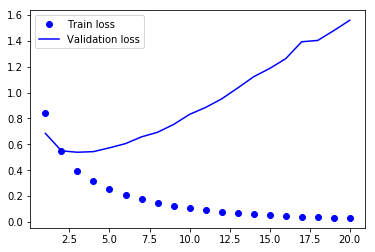

In [37]:
eval_metric(base_history, 'loss')

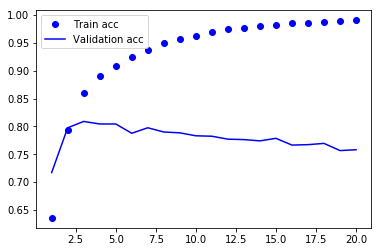

In [56]:
eval_metric(base_history, 'acc')

 it seem like our defined model is starting to overfit after 4 epocs of training
let's handle the overfitting


THe ways to handle overfitting
Handling overfitting
Now, we can try to do something about the overfitting. There are different options to do that.

Option 1: reduce the network's size by removing layers or reducing the number of hidden elements in the layers
Option 2: add regularization, which comes down to adding a cost to the loss function for large weights
Option 3: adding dropout layers, which will randomly remove certain features by setting them to zero

In [ ]:
#1 Reducing the network size 
#We reduce the network's size by removing one layer and lowering the number of hidden elements in the remaining layer to 32.

In [38]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 320,131
Trainable params: 320,131
Non-trainable params: 0
_________________________________________________________________


In [39]:
reduced_history = deep_model(reduced_model)

In [40]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()

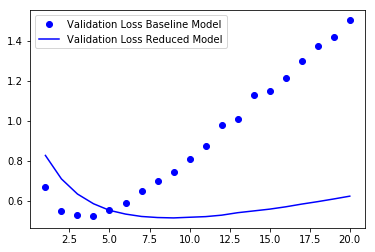

In [60]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')

Adding regularization
To address overfitting, we can also add regularization to the model. Let's try with L2 regularization.

In [41]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [42]:
reg_history = deep_model(reg_model)

In [ ]:
For the regularized model we notice that it starts overfitting earlier than the baseline model. However, the loss increases much slower afterwards.

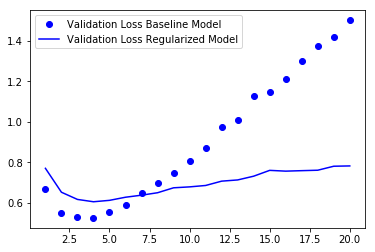

In [63]:
compare_loss_with_baseline(reg_history, 'Regularized Model')

Adding dropout layers



The last option we'll try is to add dropout layers.

In [65]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [66]:
drop_history = deep_model(drop_model)

The model with dropout layers starts overfitting a bit later than the baseline model. The loss also increases slower than the baseline model.

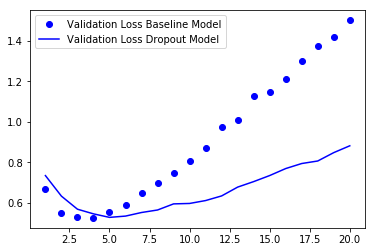

In [67]:
compare_loss_with_baseline(drop_history, 'Dropout Model')

In [68]:
def test_model(model, epoch_stop):
    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_oh, y_test_oh)
    
    return results

In [69]:
base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))


1464/1464 [==============================] - 0s 300us/step
/n
Test accuracy of baseline model: 77.32%


In [70]:
reduced_results = test_model(reduced_model, 10)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

1464/1464 [==============================] - 0s 163us/step
/n
Test accuracy of reduced model: 78.14%


In [71]:
reg_results = test_model(reg_model, 5)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))


1464/1464 [==============================] - 1s 397us/step
/n
Test accuracy of regularized model: 79.10%


In [72]:
drop_results = test_model(drop_model, 6)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

1464/1464 [==============================] - 0s 112us/step
/n
Test accuracy of dropout model: 79.30%


In [ ]:
#Conclusion
As we can see above, the model with the dropout layers performs the best on the test data.


In [48]:
#padding the sequences 

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)


In [49]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

In [51]:
def compile_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history

In [55]:
MAX_LEN=24
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))
emb_model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])


emb_history = emb_model.fit(X_train_emb, y_train_emb,epochs=NB_START_EPOCHS,batch_size=BATCH_SIZE
                     , validation_data=  (X_valid_emb, y_valid_emb),verbose=0)

In [53]:
def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

In [54]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

1464/1464 [==============================] - 0s 22us/step
/n
Test accuracy of word embeddings model: 77.87%


# Using pre-trained word embeddings


In [71]:
GLOVE_DIM=100

In [70]:
emb_dict = {}
glove = open('/Users/manaswithachimakurthi/Desktop/glove/glove.twitter.27B.100d.txt','r')
for line in glove:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    emb_dict[word] = vector
glove.close()

In [72]:
emb_matrix = np.zeros((NB_WORDS, GLOVE_DIM))

for w, i in tk.word_index.items():
    # The word_index contains a token for all words of the training data so we need to limit that
    if i < NB_WORDS:
        vect = emb_dict.get(w)
        # Check if the word from the training data occurs in the GloVe word embeddings
        # Otherwise the vector is kept with only zeros
        if vect is not None:
            emb_matrix[i] = vect
    else:
        break

In [77]:
# mlp on pretrained word vectors


glove_model = models.Sequential()
glove_model.add(layers.Embedding(NB_WORDS, GLOVE_DIM, input_length=MAX_LEN))
glove_model.add(layers.Flatten())
glove_model.add(layers.Dense(3, activation='softmax'))
glove_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 24, 100)           1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 7203      
Total params: 1,007,203
Trainable params: 1,007,203
Non-trainable params: 0
_________________________________________________________________


In [78]:
glove_model.layers[0].set_weights([emb_matrix])
glove_model.layers[0].trainable = False

In [80]:
glove_model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])


emb_history = emb_model.fit(X_train_emb, y_train_emb,epochs=NB_START_EPOCHS,batch_size=BATCH_SIZE
                     , validation_data=  (X_valid_emb, y_valid_emb),verbose=0)

glove_history =glove_model.fit( X_train_emb, y_train_emb,epochs=NB_START_EPOCHS,batch_size=BATCH_SIZE,validation_data=  ( X_valid_emb, y_valid_emb))
acc=glove_history.history['acc'][-1]

Train on 11858 samples, validate on 1318 samples
Epoch 1/20
11858/11858 [==============================] - 0s 41us/step - loss: 0.4498 - acc: 0.8224 - val_loss: 0.6554 - val_acc: 0.7428
Epoch 2/20
11858/11858 [==============================] - 0s 12us/step - loss: 0.4421 - acc: 0.8280 - val_loss: 0.6626 - val_acc: 0.7322
Epoch 3/20
11858/11858 [==============================] - 0s 10us/step - loss: 0.4395 - acc: 0.8279 - val_loss: 0.6626 - val_acc: 0.7390
Epoch 4/20
11858/11858 [==============================] - 0s 10us/step - loss: 0.4370 - acc: 0.8285 - val_loss: 0.6672 - val_acc: 0.7375
Epoch 5/20
11858/11858 [==============================] - 0s 12us/step - loss: 0.4347 - acc: 0.8278 - val_loss: 0.6653 - val_acc: 0.7367
Epoch 6/20
11858/11858 [==============================] - 0s 12us/step - loss: 0.4326 - acc: 0.8283 - val_loss: 0.6811 - val_acc: 0.7382
Epoch 7/20
11858/11858 [==============================] - 0s 12us/step - loss: 0.4308 - acc: 0.8308 - val_loss: 0.6718 - val_acc:

In [81]:
print(acc)

0.8390959691068418


In [82]:
glove_results = test_model(glove_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 3)
print('/n')
print('Test accuracy of word glove model: {0:.2f}%'.format(glove_results[1]*100))

1464/1464 [==============================] - 0s 23us/step
/n
Test accuracy of word glove model: 72.95%


# Training word embeddings with more dimensions¶

In [84]:
emb_model2 = models.Sequential()
emb_model2.add(layers.Embedding(NB_WORDS, GLOVE_DIM, input_length=MAX_LEN))
emb_model2.add(layers.Flatten())
emb_model2.add(layers.Dense(3, activation='softmax'))
emb_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 24, 100)           1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 7203      
Total params: 1,007,203
Trainable params: 1,007,203
Non-trainable params: 0
_________________________________________________________________


In [85]:
emb_model2.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])





emb_history2 = emb_model2.fit (X_train_emb, y_train_emb,epochs=NB_START_EPOCHS,batch_size=BATCH_SIZE,validation_data=( X_valid_emb, y_valid_emb))
emb_history2.history['acc'][-1]

Train on 11858 samples, validate on 1318 samples
Epoch 1/20
11858/11858 [==============================] - 1s 83us/step - loss: 0.9097 - acc: 0.6189 - val_loss: 0.8396 - val_acc: 0.6206
Epoch 2/20
11858/11858 [==============================] - 0s 28us/step - loss: 0.7559 - acc: 0.6714 - val_loss: 0.7468 - val_acc: 0.6737
Epoch 3/20
11858/11858 [==============================] - 0s 33us/step - loss: 0.6477 - acc: 0.7310 - val_loss: 0.6743 - val_acc: 0.7071
Epoch 4/20
11858/11858 [==============================] - 0s 28us/step - loss: 0.5502 - acc: 0.7972 - val_loss: 0.6238 - val_acc: 0.7329A: 0s - loss: 0.5722 - acc: 0.
Epoch 5/20
11858/11858 [==============================] - 0s 30us/step - loss: 0.4685 - acc: 0.8457 - val_loss: 0.5759 - val_acc: 0.7633
Epoch 6/20
11858/11858 [==============================] - 0s 27us/step - loss: 0.4017 - acc: 0.8714 - val_loss: 0.5583 - val_acc: 0.7724
Epoch 7/20
11858/11858 [==============================] - 0s 28us/step - loss: 0.3455 - acc: 0.8914

0.9875189745319616

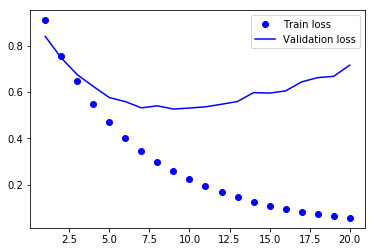

In [86]:
eval_metric(emb_history2, 'loss')

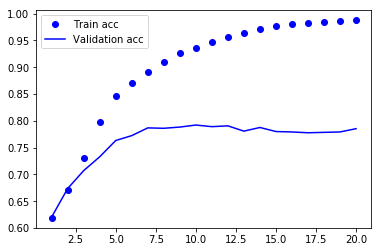

In [87]:
eval_metric(emb_history2, 'acc')

In [88]:
emb_results2 = test_model(emb_model2, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 3)
print('/n')
print('Test accuracy of word embedding model 2: {0:.2f}%'.format(emb_results2[1]*100))



1464/1464 [==============================] - 0s 38us/step
/n
Test accuracy of word embedding model 2: 76.78%


# Conclusion


#The best result is achieved with 100-dimensional word embeddings that are trained on the available data. This even outperforms the use of word embeddings that were trained on a much larger Twitter corpus.